## K-Means with new data

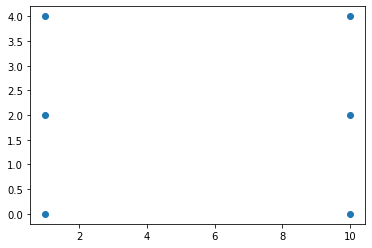

In [50]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
plt.scatter(X[:, 0], X[:, 1])

In [51]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [52]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0], dtype=int32)

In [53]:
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

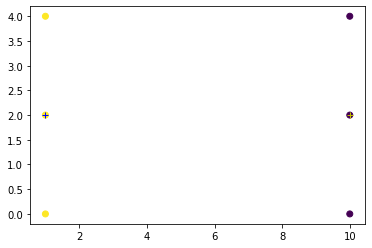

In [54]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.plot(kmeans.cluster_centers_[0, 0], kmeans.cluster_centers_[0, 1], 'y+')
plt.plot(kmeans.cluster_centers_[1, 0], kmeans.cluster_centers_[1, 1], 'b+')

In [55]:
new_data = np.array([[0, 0], [12, 3]])

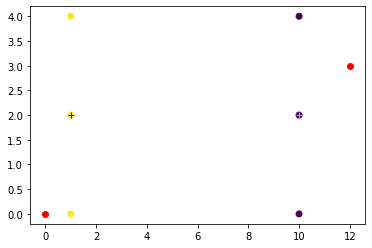

In [56]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.plot(kmeans.cluster_centers_[0, 0], kmeans.cluster_centers_[0, 1], 'y+')
plt.plot(kmeans.cluster_centers_[1, 0], kmeans.cluster_centers_[1, 1], 'b+')
plt.scatter(new_data[:, 0], new_data[:, 1], c='r')

In [57]:
preds = kmeans.predict(new_data)
print(preds)

[1 0]


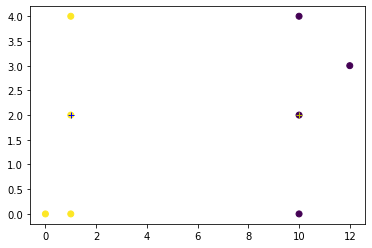

In [58]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.plot(kmeans.cluster_centers_[0, 0], kmeans.cluster_centers_[0, 1], 'y+')
plt.plot(kmeans.cluster_centers_[1, 0], kmeans.cluster_centers_[1, 1], 'b+')
plt.scatter(new_data[:, 0], new_data[:, 1], c=preds)

## Exporting a model in scikit-learn

In [60]:
from sklearn import datasets
from sklearn import metrics
from sklearn.externals import joblib
import xgboost as xgb
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
bst = xgb.train({}, dtrain, 20)

In [61]:
dtest = xgb.DMatrix(X_test)
preds = bst.predict(dtest)

In [62]:
preds

array([1.0012233e+00, 5.2052736e-04, 1.9109039e+00, 1.0012233e+00,
       9.8718429e-01, 5.2052736e-04, 9.9917245e-01, 1.7749625e+00,
       1.0693518e+00, 9.9917245e-01, 1.7410066e+00, 5.2052736e-04,
       5.2052736e-04, 5.2052736e-04, 5.2052736e-04, 8.7186658e-01,
       2.0000472e+00, 9.9917245e-01, 1.0023540e+00, 2.0000472e+00,
       5.2052736e-04, 2.0093708e+00, 5.2052736e-04, 2.0000472e+00,
       1.9980808e+00, 1.9986461e+00, 1.9183222e+00, 1.9972388e+00,
       5.2052736e-04, 5.2052736e-04, 5.2052736e-04, 5.2052736e-04,
       9.9917245e-01, 5.2052736e-04, 5.2052736e-04, 1.8860964e+00,
       9.9489373e-01, 5.2052736e-04, 5.2052736e-04, 5.2052736e-04,
       1.9955810e+00, 8.7186658e-01, 1.0012233e+00, 5.2052736e-04,
       5.2052736e-04, 9.9917245e-01, 1.3086872e+00, 1.9986461e+00,
       9.9917245e-01, 1.9980808e+00], dtype=float32)

In [63]:
joblib.dump(bst, 'model.joblib')

['model.joblib']

In [64]:
!ls

model.h5  model.joblib	raw.githubusercontent.com  sample_data


In [66]:
model = joblib.load('model.joblib')

In [67]:
preds_loaded = model.predict(dtest)

In [68]:
preds_loaded

array([1.0012233e+00, 5.2052736e-04, 1.9109039e+00, 1.0012233e+00,
       9.8718429e-01, 5.2052736e-04, 9.9917245e-01, 1.7749625e+00,
       1.0693518e+00, 9.9917245e-01, 1.7410066e+00, 5.2052736e-04,
       5.2052736e-04, 5.2052736e-04, 5.2052736e-04, 8.7186658e-01,
       2.0000472e+00, 9.9917245e-01, 1.0023540e+00, 2.0000472e+00,
       5.2052736e-04, 2.0093708e+00, 5.2052736e-04, 2.0000472e+00,
       1.9980808e+00, 1.9986461e+00, 1.9183222e+00, 1.9972388e+00,
       5.2052736e-04, 5.2052736e-04, 5.2052736e-04, 5.2052736e-04,
       9.9917245e-01, 5.2052736e-04, 5.2052736e-04, 1.8860964e+00,
       9.9489373e-01, 5.2052736e-04, 5.2052736e-04, 5.2052736e-04,
       1.9955810e+00, 8.7186658e-01, 1.0012233e+00, 5.2052736e-04,
       5.2052736e-04, 9.9917245e-01, 1.3086872e+00, 1.9986461e+00,
       9.9917245e-01, 1.9980808e+00], dtype=float32)

In [69]:
np.allclose(preds, preds_loaded)

True

## Exporting a model with Keras

In [70]:
# MLP for Pima Indians Dataset saved to single file
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

# load pima indians dataset
dataset = loadtxt("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# define model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)

# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# save model and architecture to single file
model.save("model.h5")
print("Saved model to disk")

accuracy: 76.04%
Saved model to disk


In [71]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [72]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model

# load model
model_loaded = load_model('model.h5')

# summarize model
model_loaded.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [73]:
# evaluate the model
scores = model_loaded.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 76.04%
